# Single Cell Sequencing
## Gene exploration


Uses exon data extracted from: zUMIs_output\expression\*.dgecounts.rds and gene data from: zUMIs_output\expression\*.gene_names.txt<br>


In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy
import anndata as ad
import hdf5plugin
from sklearn.decomposition import TruncatedSVD
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os 
#external modules
#pretty plotting
import seaborn as sb
import sys 
import config as general_paths
import warnings
warnings.filterwarnings("ignore")
sb.set_context(context='poster')

import copy

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80)

scanpy==1.9.8 anndata==0.9.2 umap==0.5.5 numpy==1.24.4 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.1.3 statsmodels==0.14.1 igraph==0.10.8 louvain==0.8.1 pynndescent==0.5.11


In [2]:
figure_path = general_paths.figures_path
data_path = general_paths.data_path
output_path = general_paths.output_path
local_path = general_paths.local_path
input_path = output_path

## Data loading


In [3]:

adata_path = os.path.join(input_path,'ad_subset.h5ad')

SELECTED_LOUVAIN = 'louvain_r0.2'


In [4]:
adata = ad.read_h5ad(adata_path)

In [5]:
adata

AnnData object with n_obs × n_vars = 399 × 16000
    obs: 'sample', 'stimulus', 'red', 'green', 'well_id', 'plate_number', 'batch', 'stimulus_name', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'n_genes', 'to_exclude', 'plate_str', 'louvain_r0.5', 'louvain_r1', 'louvain_r1.5', 'louvain_r2', 'louvain_r2.5', 'louvain_r0.1', 'louvain_r0.2', 'louvain_r0.3', 'louvain_r0.4', 'louvain_r1.0', 'louvain_r2.0', 'dpt_pseudotime'
    var: 'gene_id', 'gene_name', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'diffmap_evals', 'draw_graph', 'hvg', 'iroot', 'log1p', 'louvain', 'louvain_r0.1_colors', 'louvain_r0.2_colors', 'louvain_r0.2_sizes', 'louvain_r0.3_colors', 'louvain_r0.4_colors', 'louvain_r0.5_colors', 'louvain_r1.0_colors', 'louvain_r1.0_sizes', 'louvain_r1_colors', 'louvain_r2.0_colors', 'louvain_r2.5_colors', 'louvain_r

## Explore Genes

In [6]:
### Define list of relevant genes 

marker_genes = ['Trpm3','Trpm2','Smr2','Sstr2','Bmpr1b','Trpm8','Trpv1','Piezo2','Piezo1','Nppb',
                'Sst','Pvalb','Prokr2','Mrgprd','Mrgpra3','Cd34',
                'Th','Trpa1','Ntrk3','Ntrk2','Ntrk1','Ret','Tac1','Calca','Calcb','Nefh',
                'S100b','Scn10a','Slc17a8','Atf3','Pou4f3','Calb1','Calb2','Avil','Asic3',
                'Asic2','Asic1','Pou6f2','Avpr1a','Pou4f2','Sox10','Casq2','Chrna7','Chrna3',
                'P2rx3','Gfra2','Ldhb','Necab2','Spp1','Adm','Hpse','Adra2a']

## Finding marker genes

In [7]:
adata

AnnData object with n_obs × n_vars = 399 × 16000
    obs: 'sample', 'stimulus', 'red', 'green', 'well_id', 'plate_number', 'batch', 'stimulus_name', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'n_genes', 'to_exclude', 'plate_str', 'louvain_r0.5', 'louvain_r1', 'louvain_r1.5', 'louvain_r2', 'louvain_r2.5', 'louvain_r0.1', 'louvain_r0.2', 'louvain_r0.3', 'louvain_r0.4', 'louvain_r1.0', 'louvain_r2.0', 'dpt_pseudotime'
    var: 'gene_id', 'gene_name', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'diffmap_evals', 'draw_graph', 'hvg', 'iroot', 'log1p', 'louvain', 'louvain_r0.1_colors', 'louvain_r0.2_colors', 'louvain_r0.2_sizes', 'louvain_r0.3_colors', 'louvain_r0.4_colors', 'louvain_r0.5_colors', 'louvain_r1.0_colors', 'louvain_r1.0_sizes', 'louvain_r1_colors', 'louvain_r2.0_colors', 'louvain_r2.5_colors', 'louvain_r

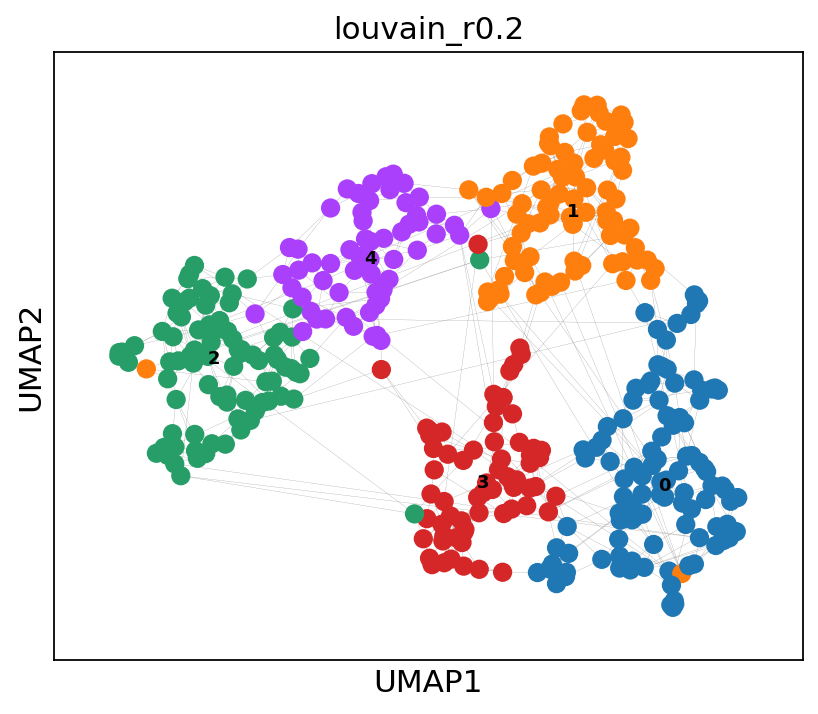

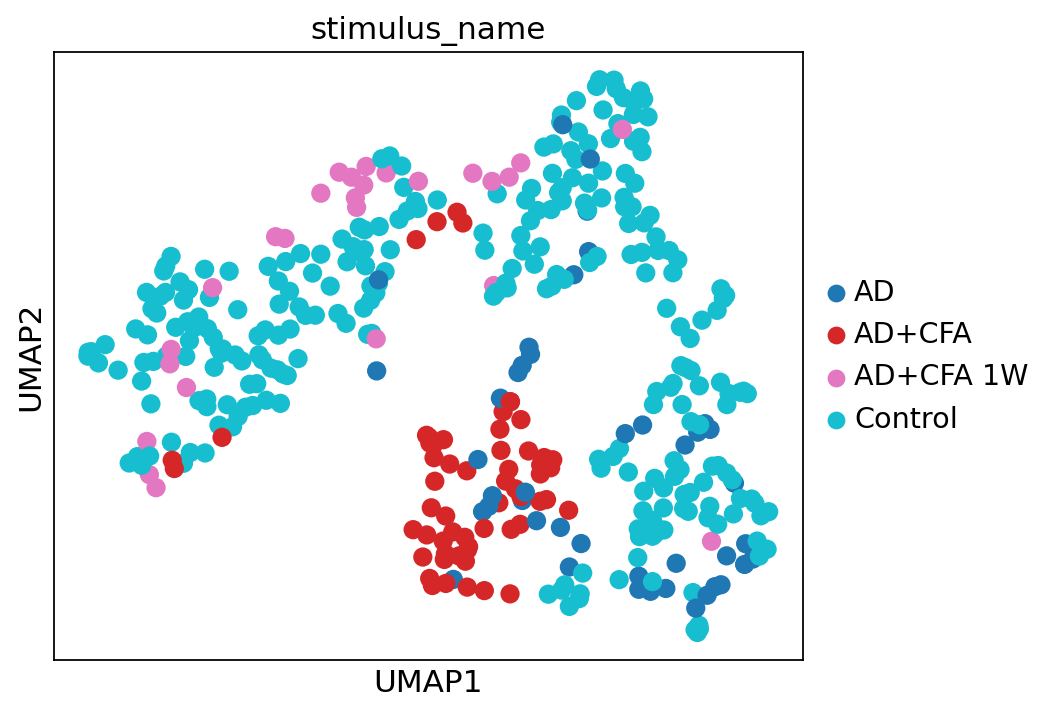

In [8]:
rcParams['figure.figsize']=(6,5)
sc.pl.umap(adata, edges=True, color = SELECTED_LOUVAIN, legend_loc= 'on data', legend_fontsize= 'xx-small')
sc.pl.umap(adata, color=['stimulus_name'], groups=['AD','AD+CFA','AD+CFA 1W','Control'], palette='tab10',use_raw=False)

In [9]:
# sc.tl.rank_genes_groups(adata_umap,SELECTED_LOUVAIN, use_raw=False, method='wilcoxon')
sc.tl.rank_genes_groups(adata, SELECTED_LOUVAIN,use_raw=False, method='wilcoxon', key_added = "rank_genes_groups")


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


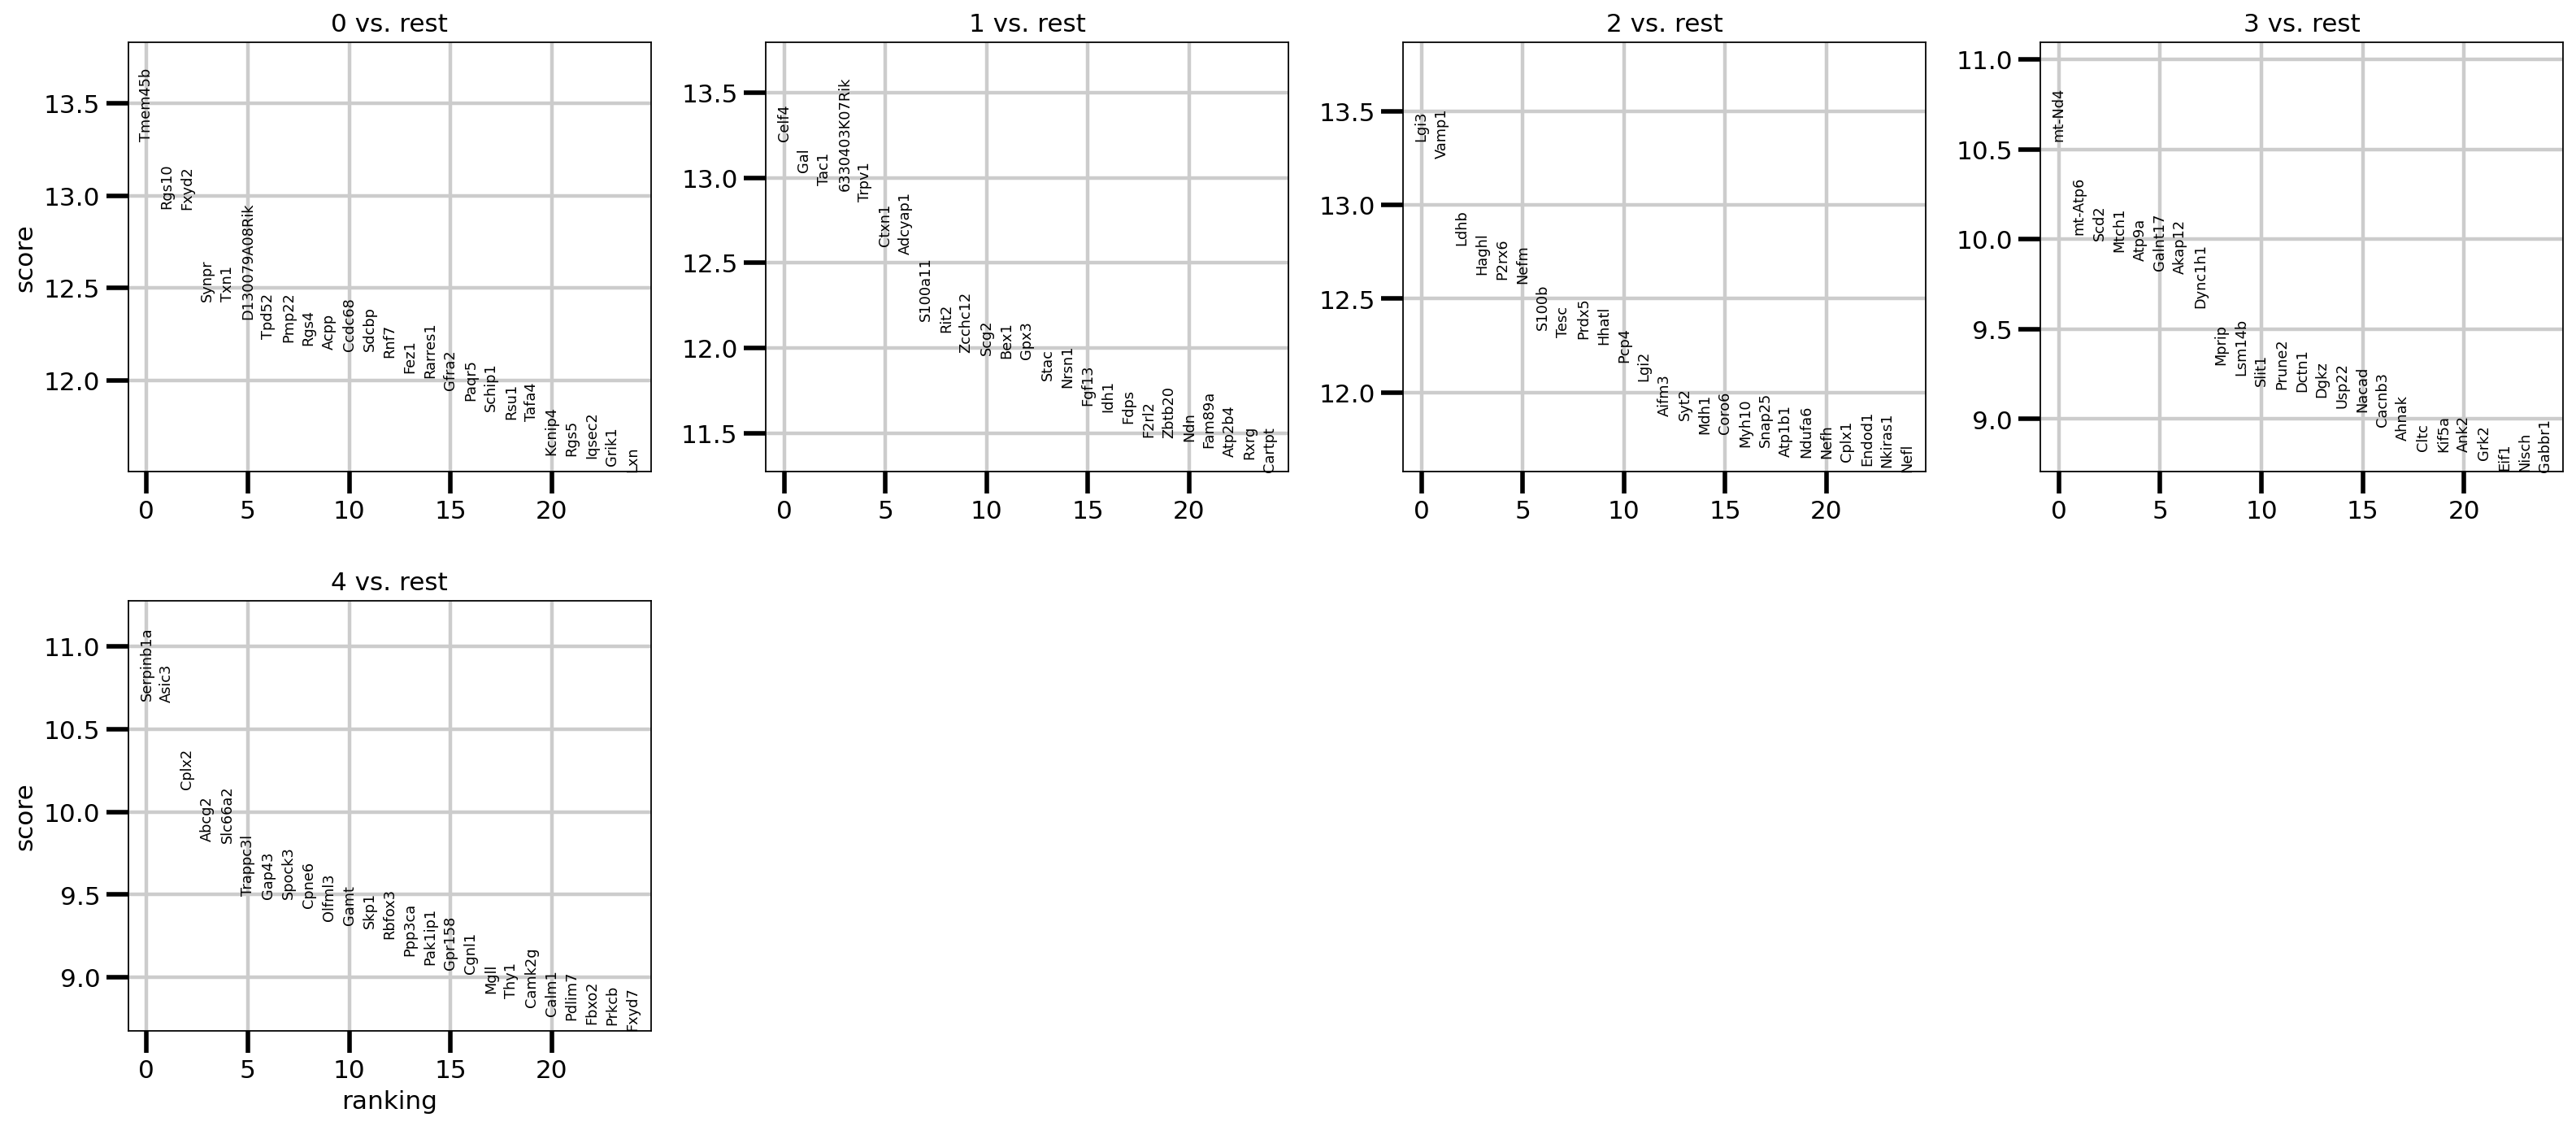

In [10]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key="rank_genes_groups")

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


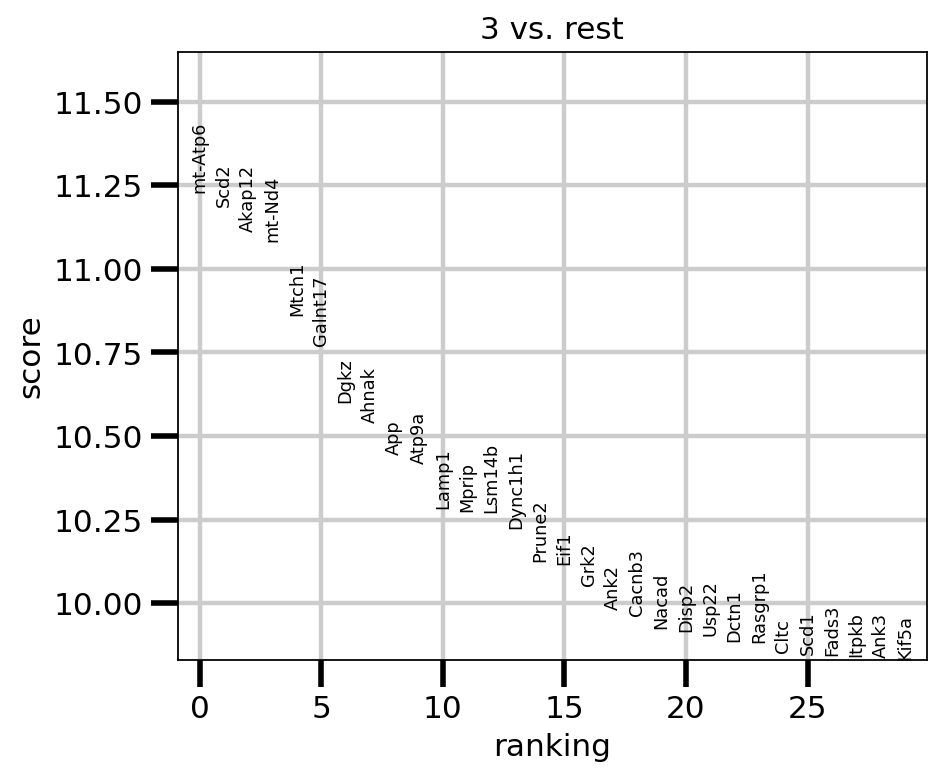

In [11]:
# Compare specific clusters
# sc.tl.rank_genes_groups(adata_umap, SELECTED_LOUVAIN, groups=["0"], reference="1", method="wilcoxon")
# sc.pl.rank_genes_groups(adata_umap, groups=["0"], n_genes=20)
sc.tl.rank_genes_groups(adata, SELECTED_LOUVAIN, groups=["3"], method="wilcoxon")
sc.pl.rank_genes_groups(adata, groups=["3"], n_genes=30)


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


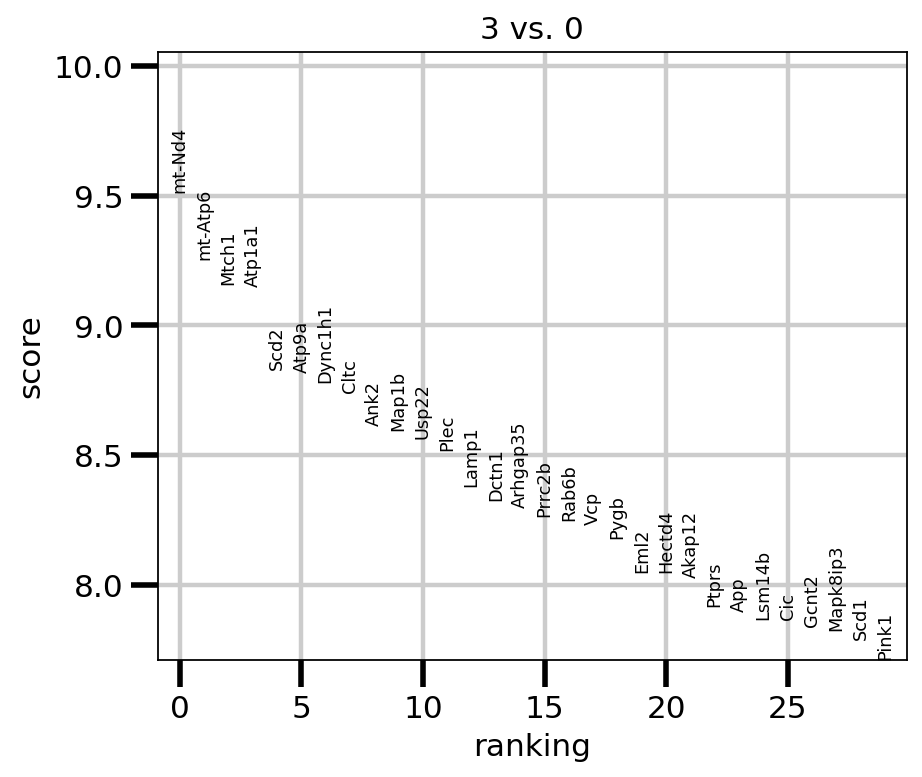

In [12]:
sc.tl.rank_genes_groups(adata, SELECTED_LOUVAIN, groups=["3"], reference="0", method="wilcoxon")
sc.pl.rank_genes_groups(adata, groups=["3"], n_genes=30)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


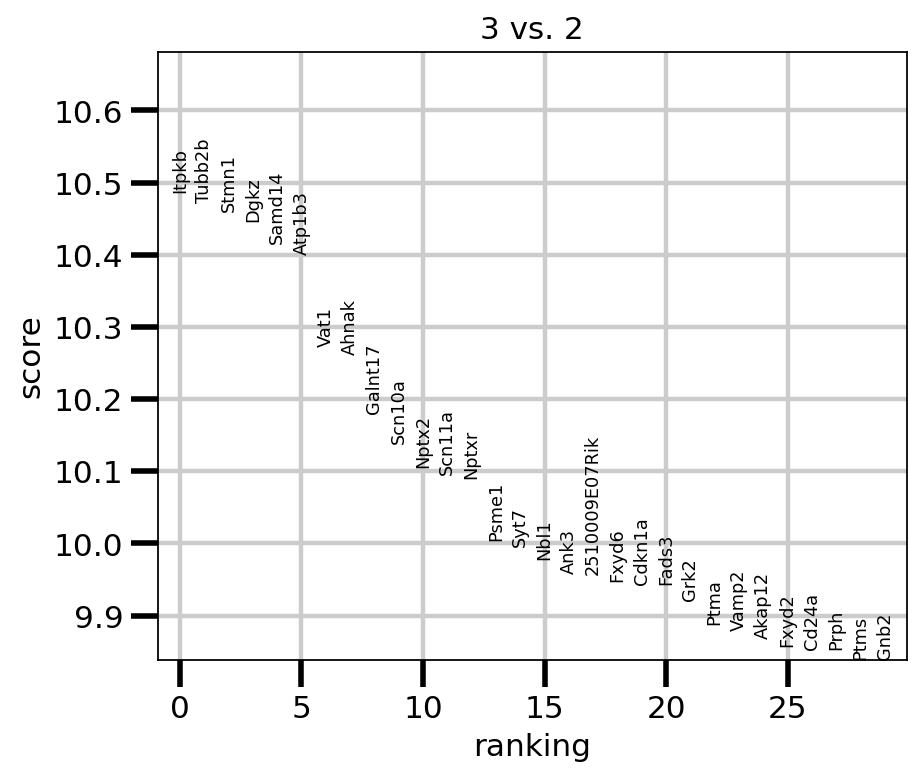

In [13]:
sc.tl.rank_genes_groups(adata, SELECTED_LOUVAIN, groups=["3"], reference="2", method="wilcoxon")
sc.pl.rank_genes_groups(adata, groups=["3"], n_genes=30)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


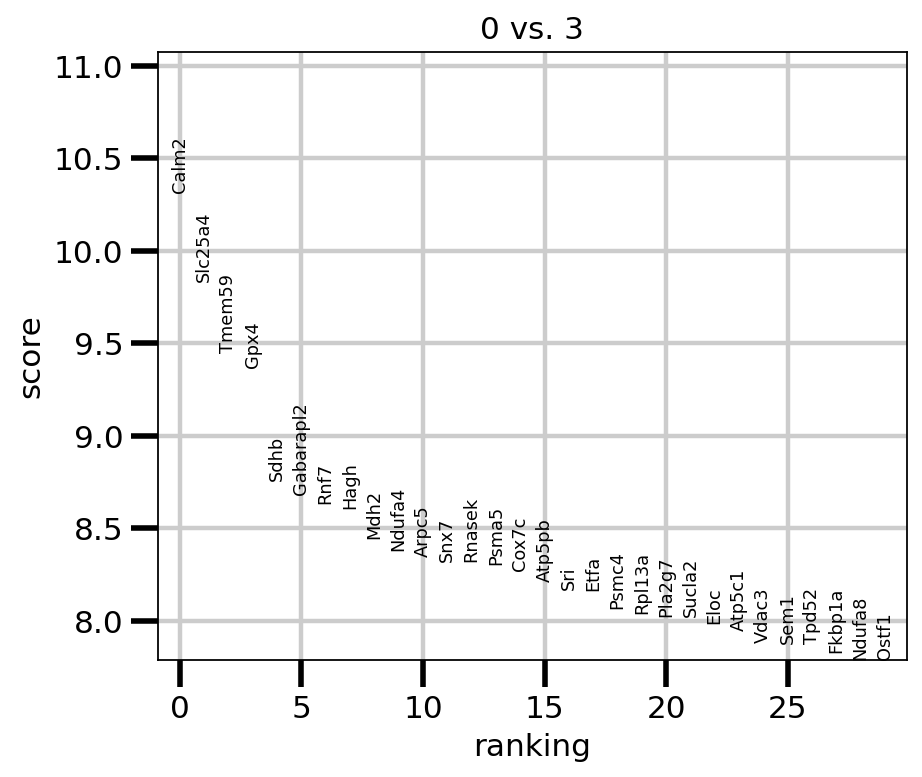

In [14]:
sc.tl.rank_genes_groups(adata, SELECTED_LOUVAIN, groups=["0"], reference="3", method="wilcoxon")
sc.pl.rank_genes_groups(adata, groups=["0"], n_genes=30)

In [15]:
adata

AnnData object with n_obs × n_vars = 399 × 16000
    obs: 'sample', 'stimulus', 'red', 'green', 'well_id', 'plate_number', 'batch', 'stimulus_name', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'n_genes', 'to_exclude', 'plate_str', 'louvain_r0.5', 'louvain_r1', 'louvain_r1.5', 'louvain_r2', 'louvain_r2.5', 'louvain_r0.1', 'louvain_r0.2', 'louvain_r0.3', 'louvain_r0.4', 'louvain_r1.0', 'louvain_r2.0', 'dpt_pseudotime'
    var: 'gene_id', 'gene_name', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'diffmap_evals', 'draw_graph', 'hvg', 'iroot', 'log1p', 'louvain', 'louvain_r0.1_colors', 'louvain_r0.2_colors', 'louvain_r0.2_sizes', 'louvain_r0.3_colors', 'louvain_r0.4_colors', 'louvain_r0.5_colors', 'louvain_r1.0_colors', 'louvain_r1.0_sizes', 'louvain_r1_colors', 'louvain_r2.0_colors', 'louvain_r2.5_colors', 'louvain_r

In [16]:
# re-run for all 
sc.tl.rank_genes_groups(adata, SELECTED_LOUVAIN, use_raw=False, method='wilcoxon', key_added = "rank_genes_groups")
pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(50) # louvain_r2 has 0-12 clasters (column names are clusters)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


0              1        2        3              4
0         Tmem45b          Celf4     Lgi3   mt-Nd4      Serpinb1a
1           Rgs10            Gal    Vamp1  mt-Atp6          Asic3
2           Fxyd2           Tac1     Ldhb     Scd2          Cplx2
3           Synpr  6330403K07Rik    Haghl    Mtch1          Abcg2
4            Txn1          Trpv1    P2rx6    Atp9a        Slc66a2
5   D130079A08Rik          Ctxn1     Nefm  Galnt17       Trappc3l
6           Tpd52        Adcyap1    S100b   Akap12          Gap43
7           Pmp22        S100a11     Tesc  Dync1h1         Spock3
8            Rgs4           Rit2    Prdx5    Mprip          Cpne6
9            Acpp        Zcchc12    Hhatl   Lsm14b         Olfml3
10         Ccdc68           Scg2     Pcp4    Slit1           Gamt
11          Sdcbp           Bex1     Lgi2   Prune2           Skp1
12           Rnf7           Gpx3    Aifm3    Dctn1         Rbfox3
13           Fez1           Stac     Syt2     Dgkz         Ppp3ca
14        Rarres1          Nrsn1     Mdh1    Usp22        Pak1ip1
15          Gfra2          Fgf13    Coro6    Nacad         Gpr158
16          Paqr5           Idh1    Myh10   Cacnb3          Cgnl1
17         Schip1           Fdps   Snap25    Ahnak           Mgll
18           Rsu1          F2rl2   Atp1b1     Cltc           Thy1
19          Tafa4         Zbtb20   Ndufa6    Kif5a         Camk2g
20         Kcnip4            Ndn     Nefh     Ank2          Calm1
21           Rgs5         Fam89a    Cplx1     Grk2         Pdlim7
22         Iqsec2         Atp2b4   Endod1     Eif1          Fbxo2
23          Grik1           Rxrg  Nkiras1    Nisch          Prkcb
24            Lxn         Cartpt     Nefl   Gabbr1          Fxyd7
25         Rnf112         Kcnmb2   Atp5pb      App  F730043M19Rik
26          Dapk2         Ift122      Ckb   Hectd4         Plxna2
27           Sae1       Arhgef28     Nsg1     Scd1      Serpinb1b
28           Hexb          Celf6    Htra1   Zdhhc2          Arrb1
29            Sri          Gfra3   Atp5c1    Raph1            Nmb
30        Tmem254        Tmem100    Mgst3     Calr           Rida
31          Nxpe2           Syt4    Pcdh7    Clip3          Dclk1
32         Exoc1l       Tmem255a   Atp5g1      Cic          Sytl3
33         Atp1b3       Tmem176b    Bcat1    Setd5           Ngfr
34           Cd34          Calca    Nat8l      C4b          Nptx1
35          Cpne3       Arhgap15     Pdhb    Itpkb          Parva
36           Scin         Pgrmc1   Ndufa8   Myo18a          Ntrk1
37           Pja1        Cacna1e  Slc17a7  Rasgrp1            Cd9
38          Fbxo9        Cacna1c    Scn1b    Rab6b         Pcp4l1
39             Th         Steap3      Clu     Ank3         Kcnip1
40           Scg3          Rab3b    Cox5a    Olfm1          Capn5
41           Prnp          Npy1r     Syt3     Syn1          Susd2
42           Cdh9           Qdpr   Hapln4    Pink1          Lynx1
43         Mtfr1l           Dgkh    Atp5h  Cacna1h         Kcnip3
44          P2ry1          Basp1   Suclg1   Adgrg1          Arl16
45          Magi1         Camk2a   Tuba4a    Gtf2i           Ly6h
46         Spink2            Asl   Prxl2b    Fads3           Fhit
47        Ppp1r1a          Gstp1    Asb13    Disp2          Htr3b
48          Ptprr          Kcnk2    Ckmt1     Amfr         Polr3g
49          Phf24          Kcnk3     Epn3   Niban2          Paqr9

In [17]:
marker_genes_dict = {
    'RA-LTMR': ['Ntrk2'],
    'C-LTMR': ['Cd34', 'Th'],
    'Itch': ['Nppb','Mrgpra3'],
    'Nonpeptidergic-Nociceptors': ['Mrgprd'],
    'Peptidergic-Nociceptors': ['Sstr2'],
    'Interoceptors': ['Adra2a','Tac1'],
    'A-HTMR': ['Smr2','Bmpr1b'],
    'Propioceptores': ['Pvalb']
}

In [18]:
len(adata.var_names)

16000

In [19]:
# there are some gene name duplicates
def unique(list1):
 
    # initialize a null list
    unique_list = []
    unique_index = []
 
    # traverse for all elements
    count = 0
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
            unique_index.append(count)
        count+=1
    return unique_list,unique_index
        
gene_name = []
for i in range(len(adata.var['gene_name'])):
    gene_name.append(adata.var['gene_name'].iloc[i])


In [20]:
# remove duplicates
unique_genes , unique_genes_index = unique(gene_name)

adata = adata[:,np.array(unique_genes_index)]

In [21]:
len(adata.var_names)

15993

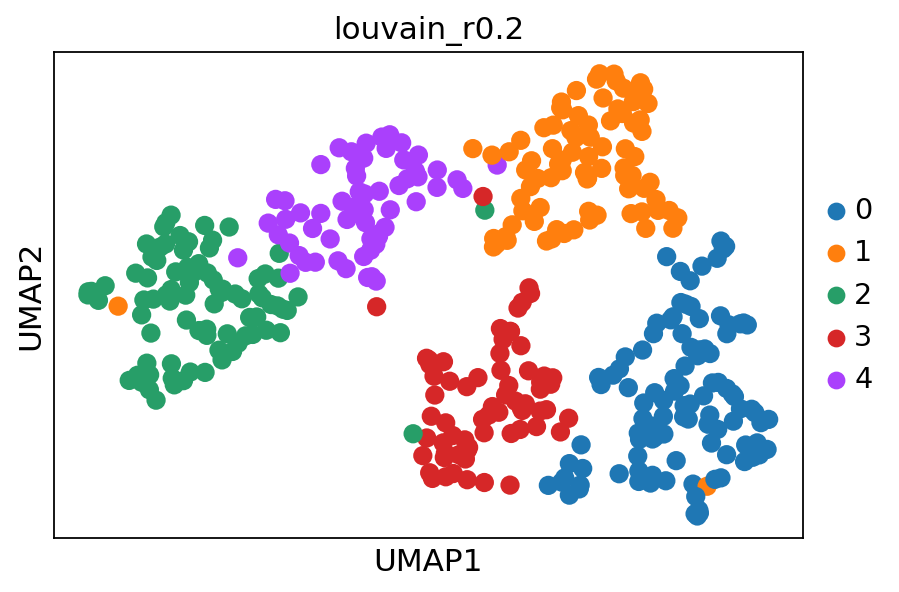

In [22]:
# show which claster is which
rcParams['figure.figsize']=(6,4)
sc.pl.umap(adata, color=SELECTED_LOUVAIN, use_raw=False)

In [23]:
# # svg plot for marcin
# # 'Ntrk3','Ntrk2','Ntrk1'
# MY_GENE = 'Ntrk2'

# sc.pl.violin(adata_umap, MY_GENE, use_raw=False, groupby=SELECTED_LOUVAIN,xlabel='Cluster', ylabel='',save='violin_'+MY_GENE+'_'+SELECTED_LOUVAIN+'.svg')


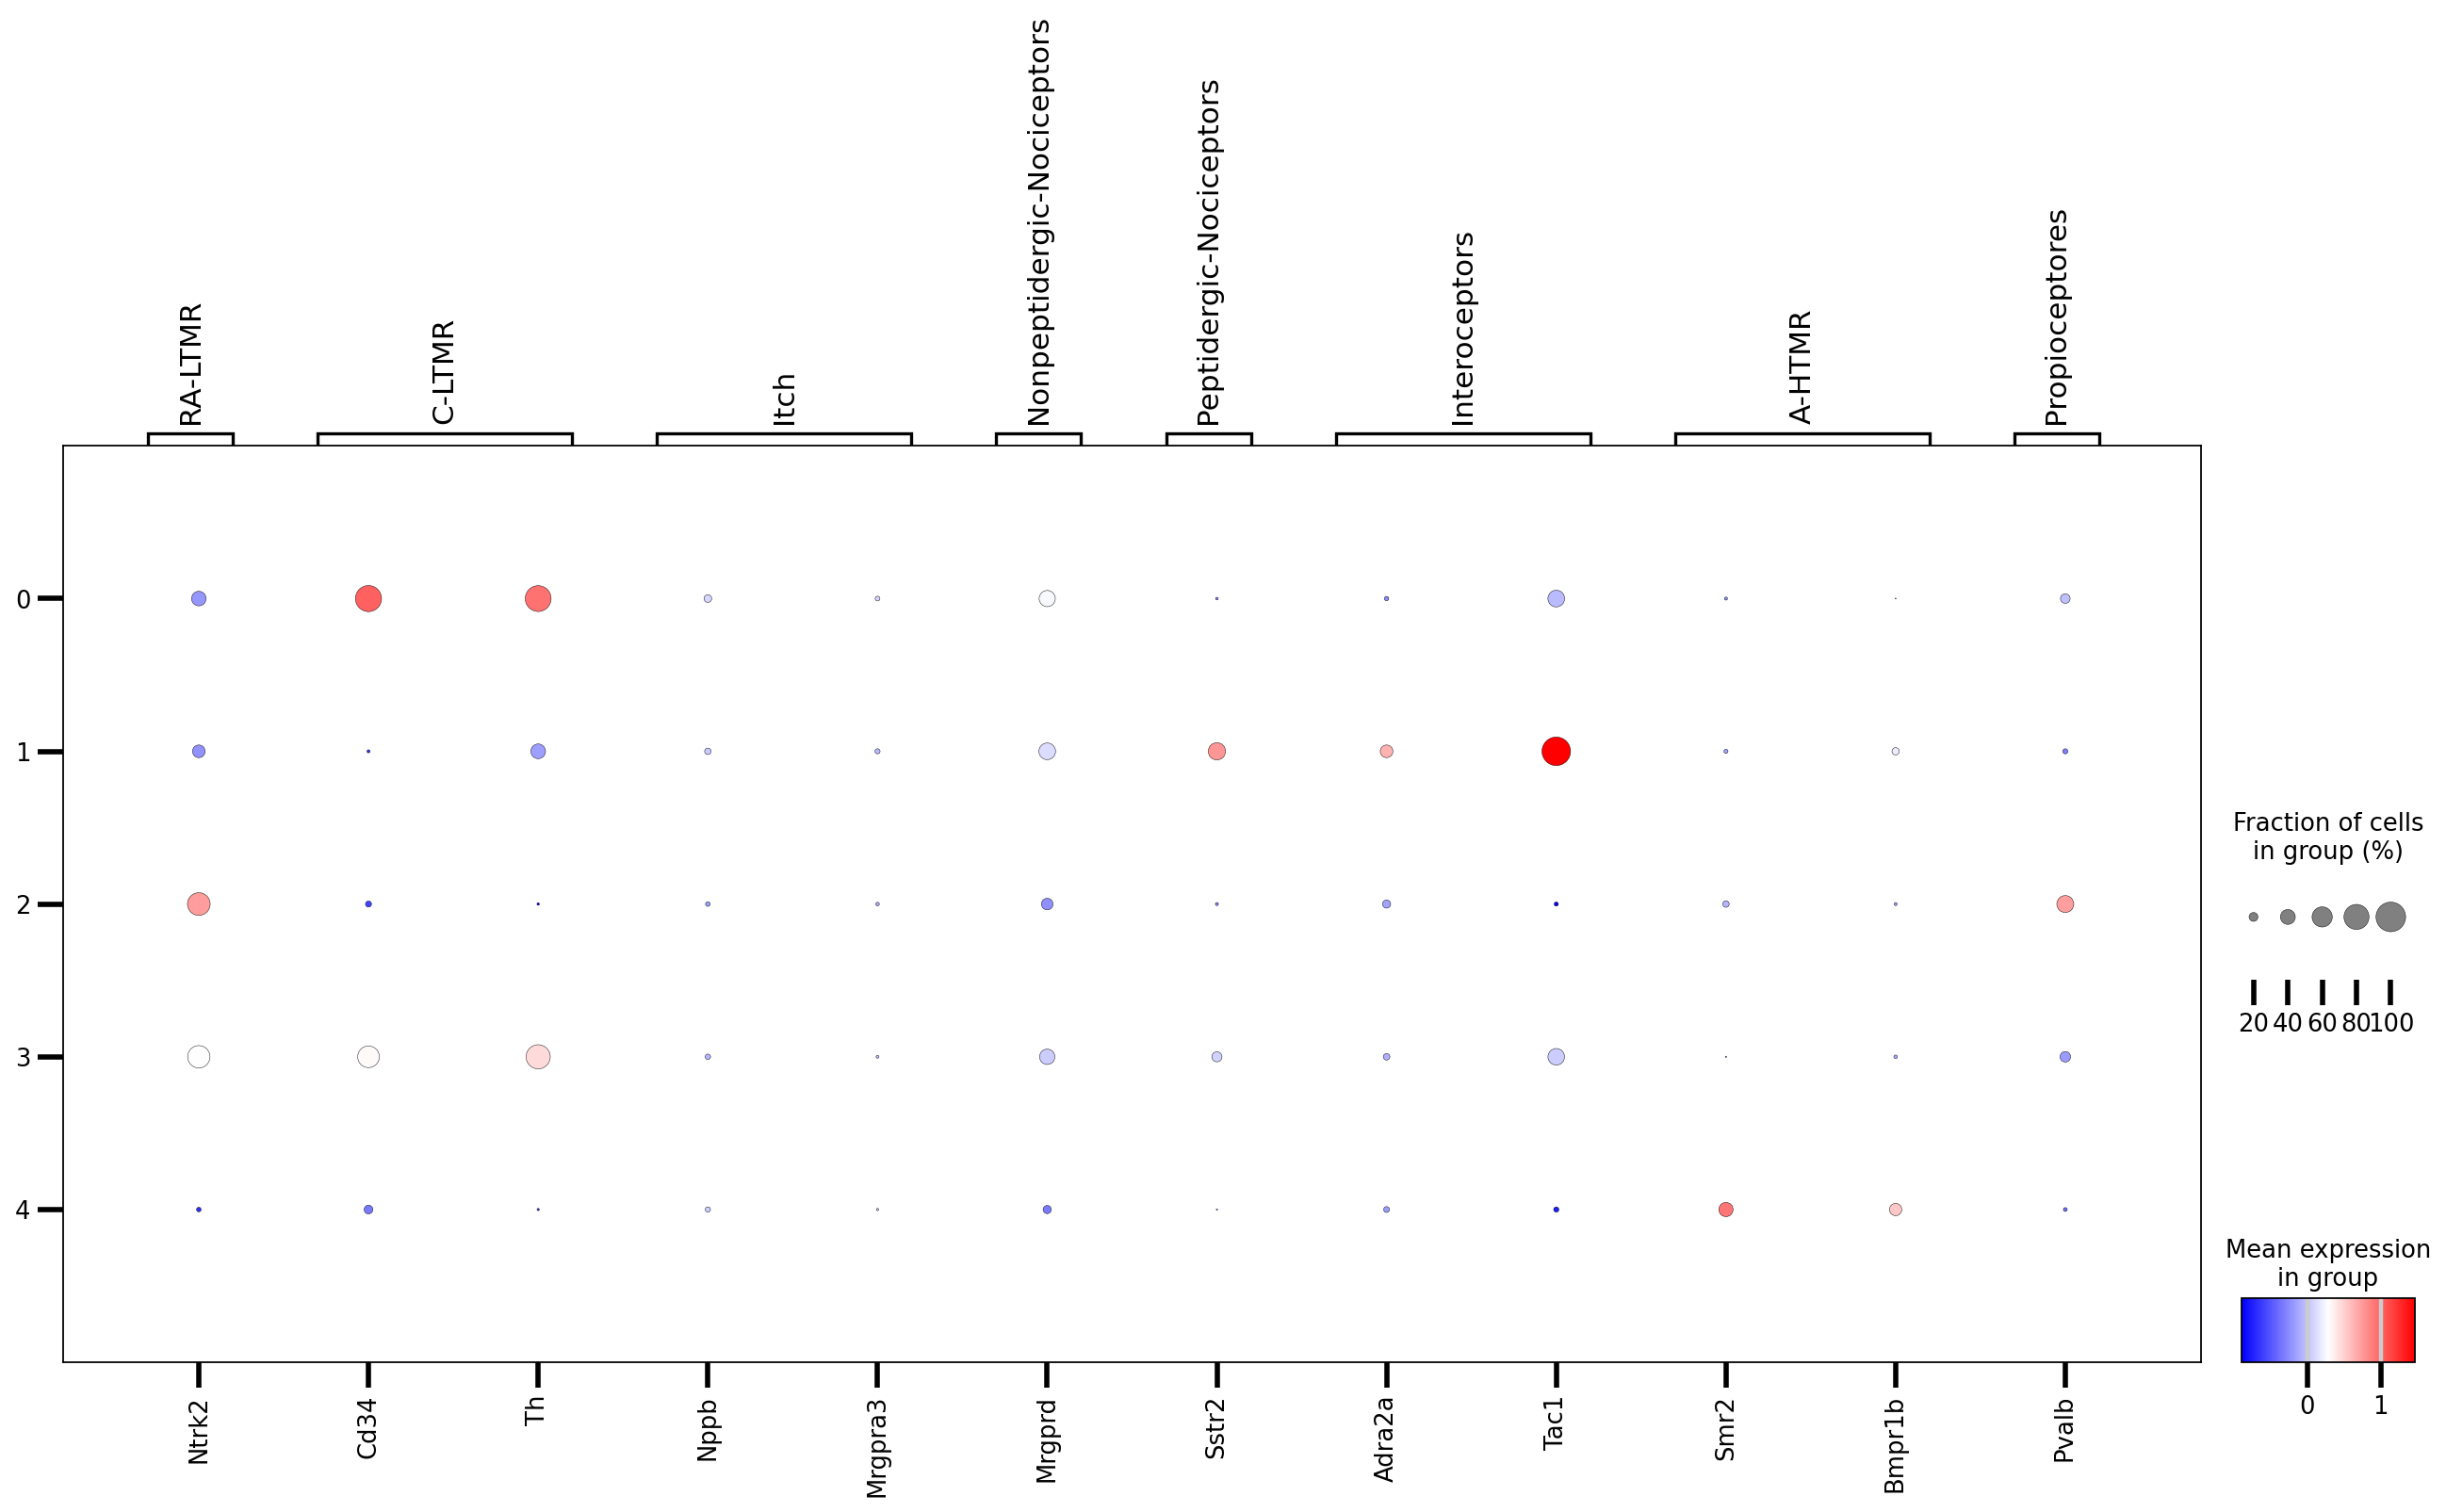

In [24]:

# show gene markers as dotplot
sc.pl.dotplot(adata, marker_genes_dict, use_raw=False, groupby=SELECTED_LOUVAIN, cmap='bwr', figsize=(20,8))

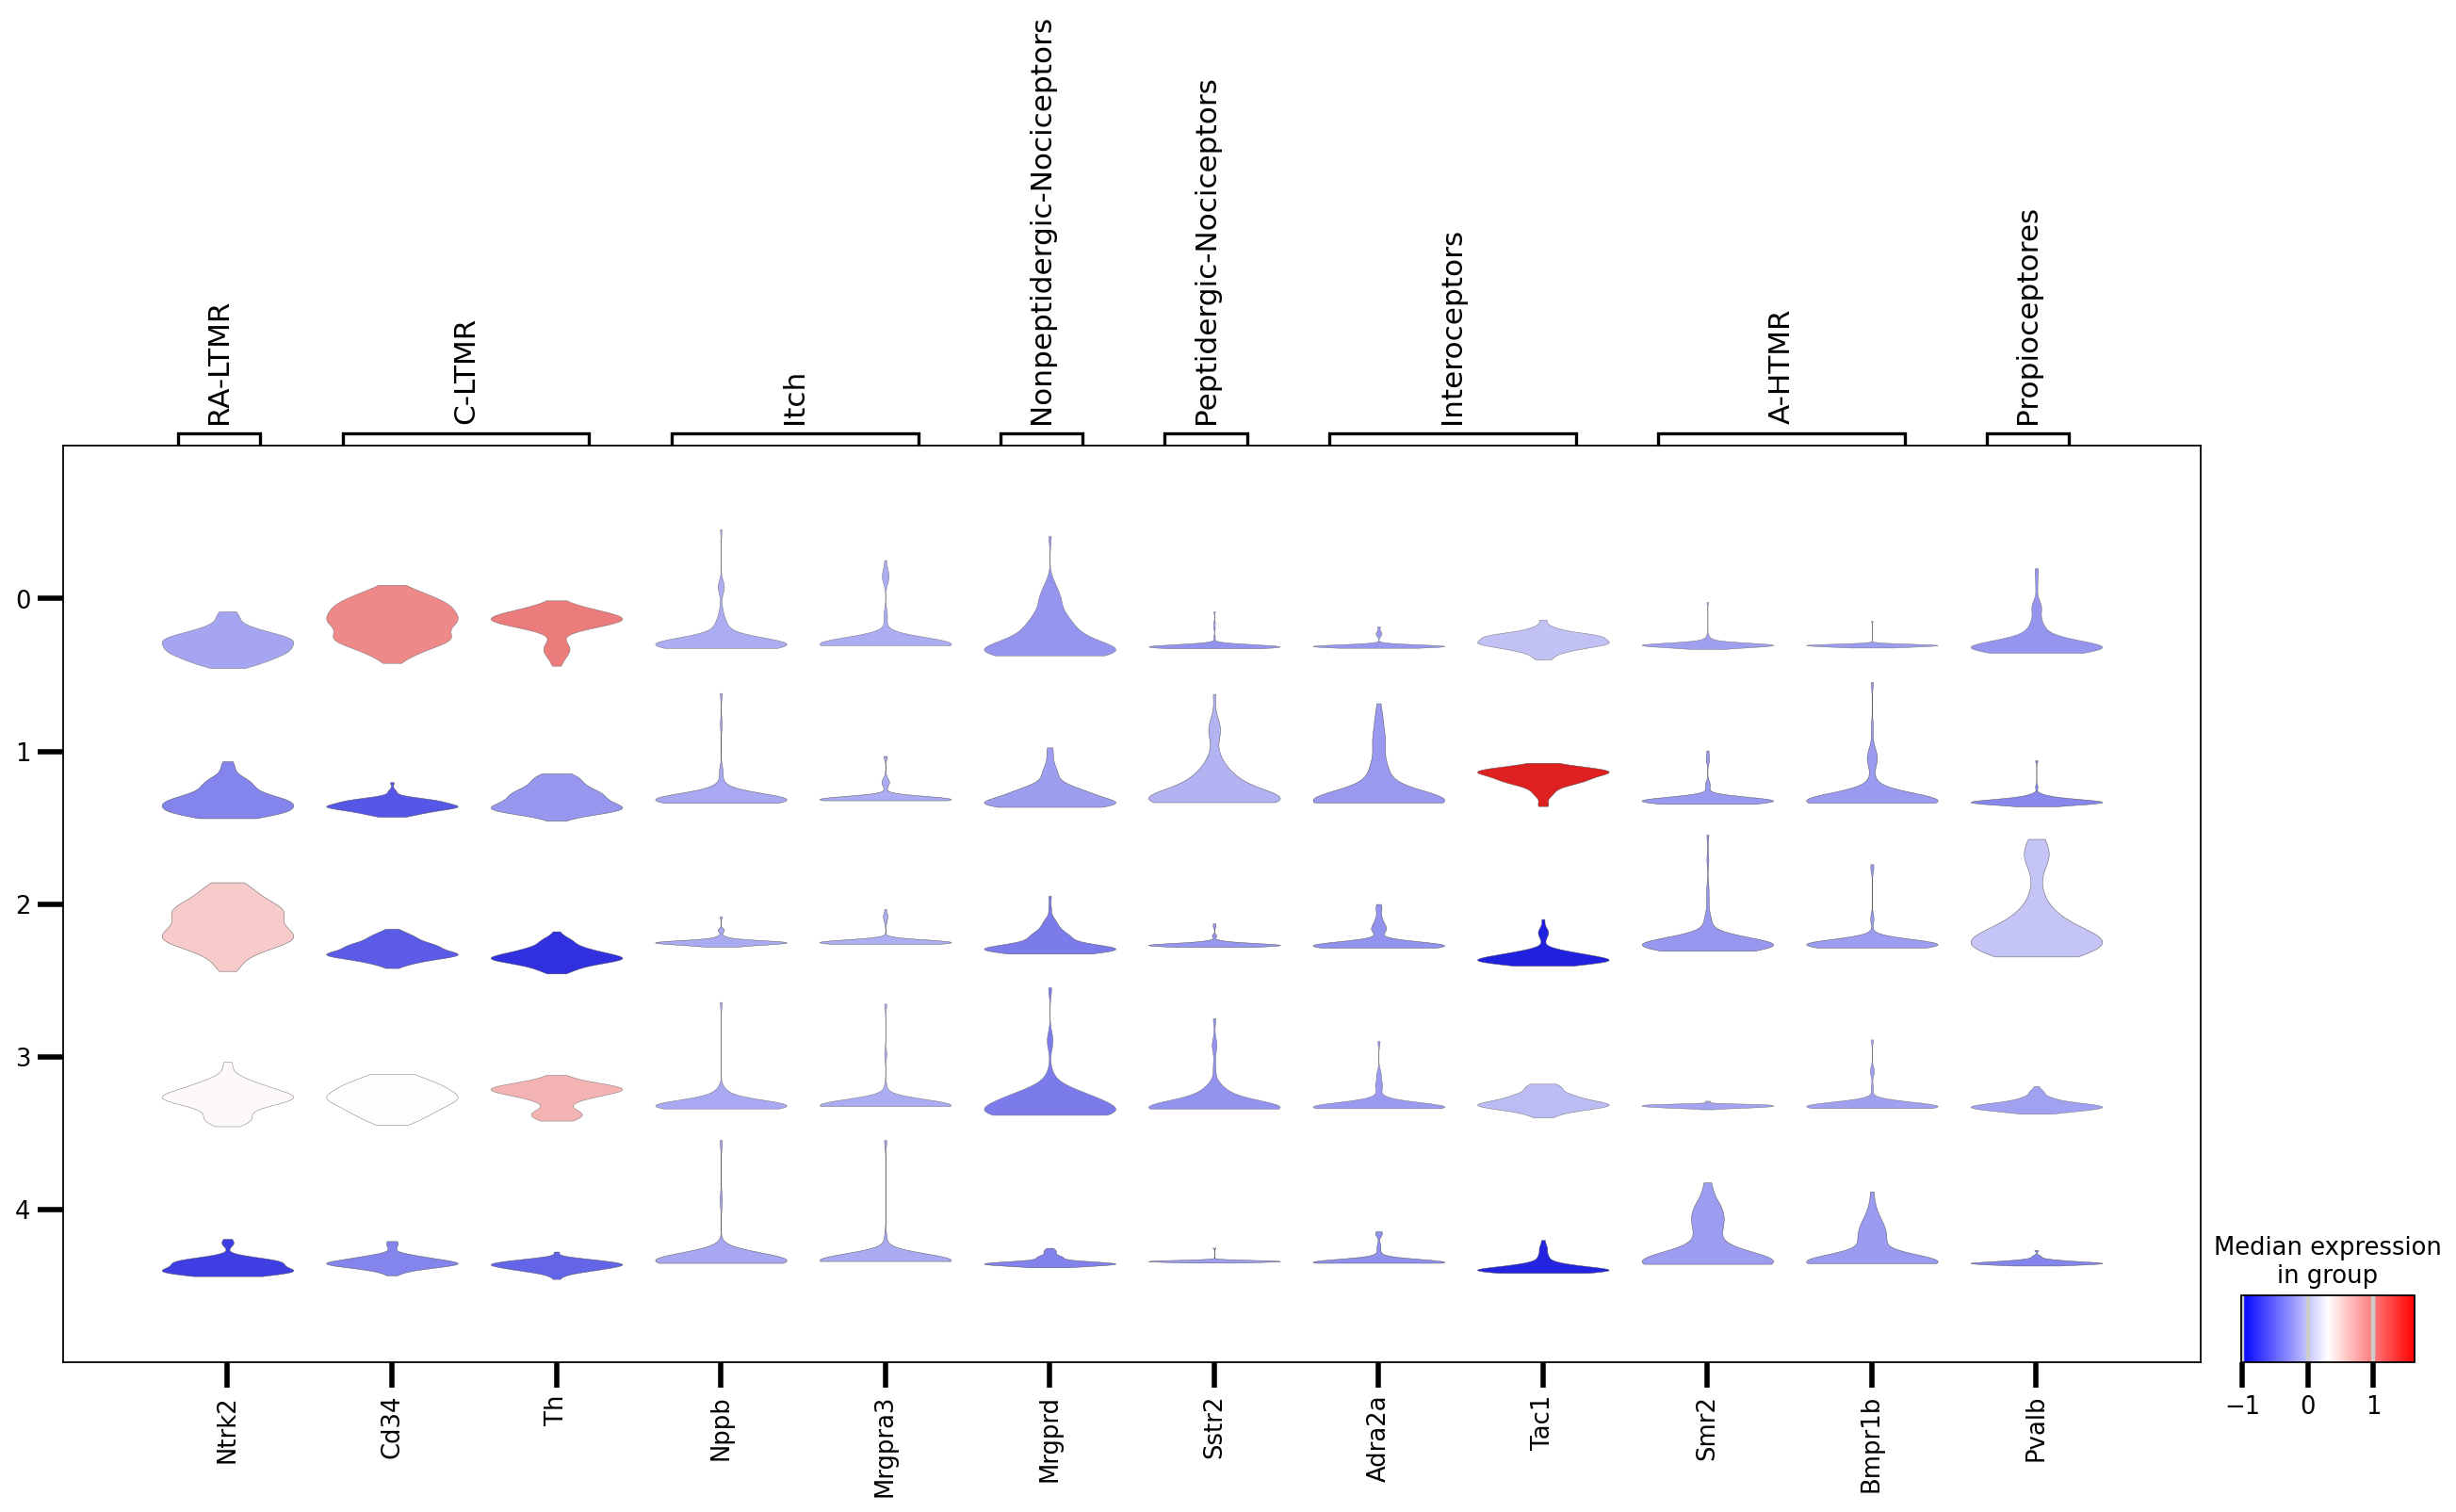

In [25]:
# show gene markers as violin plot
sc.pl.stacked_violin(adata, marker_genes_dict, use_raw=False, groupby=SELECTED_LOUVAIN, cmap='bwr',figsize=(20,8))

In [26]:
# get a list of NO_TOP_GENES from all clusters
top_genes = []
NO_TOP_GENES = 10
for el in adata.uns['rank_genes_groups']['names'][:NO_TOP_GENES]:
    top_genes.extend(el)
len(top_genes)

50

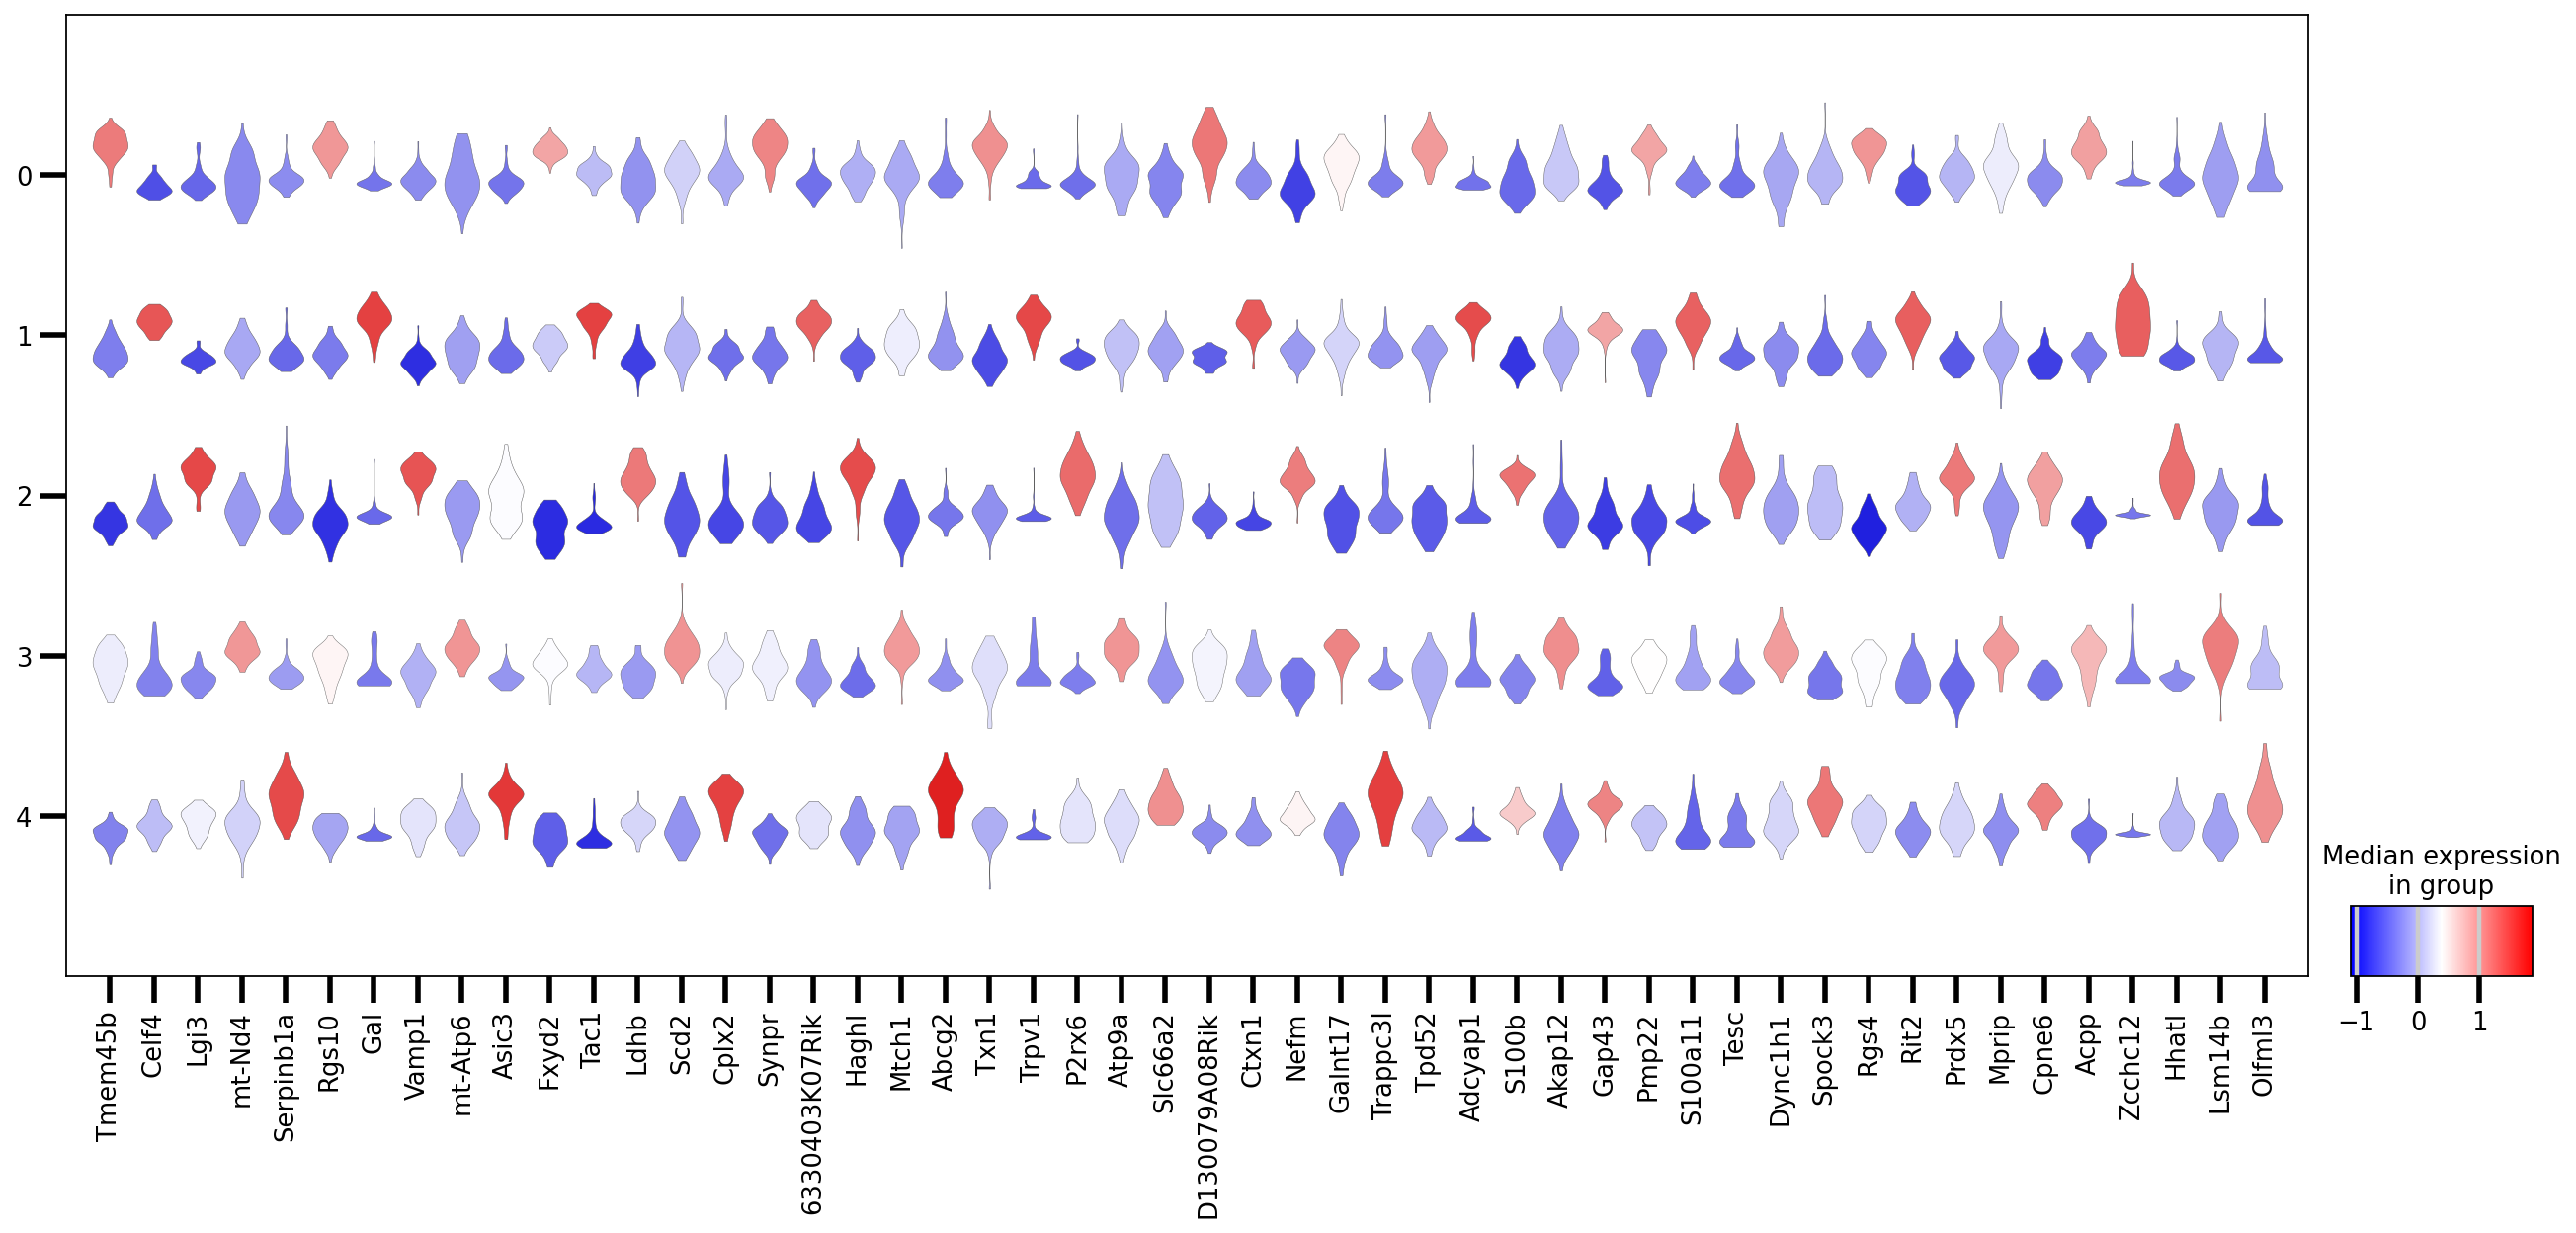

In [27]:
# show those genes as plot
sc.pl.stacked_violin(adata, top_genes, use_raw=False, groupby=SELECTED_LOUVAIN, cmap='bwr',figsize=(20,8))

Another tool to visualize gene expression per cluster is the stacked violin plot. Violin plots are a method of plotting numeric data and we can find the same information as in the box plots — median, interquartile range (describes the middle 50% of values when ordered from lowest to highest), and the lower/upper adjacent values (the smallest/largest observation that is greater/less than or equal to the lower/upper limit). One significant advantage of violin plots is that it shows the entire distribution of the data in addition to showing the abovementioned statistics

In [28]:

#Extracting the gene that expressed the highest cluster-wise
def transpose(l1, l2): 
    # iterate over list l1 to the length of an item  
    for i in range(len(l1[0])): 
        # print(i) 
        row =[] 
        for item in l1: 
            # appending to new list with values and index positions 
            # i contains index position and item contains values 
            row.append(item[i]) 
        l2.append(row) 
    return l2 

#hvg - highly variant genes
c = adata.uns['rank_genes_groups']
s = c['names'].tolist()

l2 = [] 
s2 = transpose(s, l2)


Top genes clusterwise clusters - umap embedding with heatmap


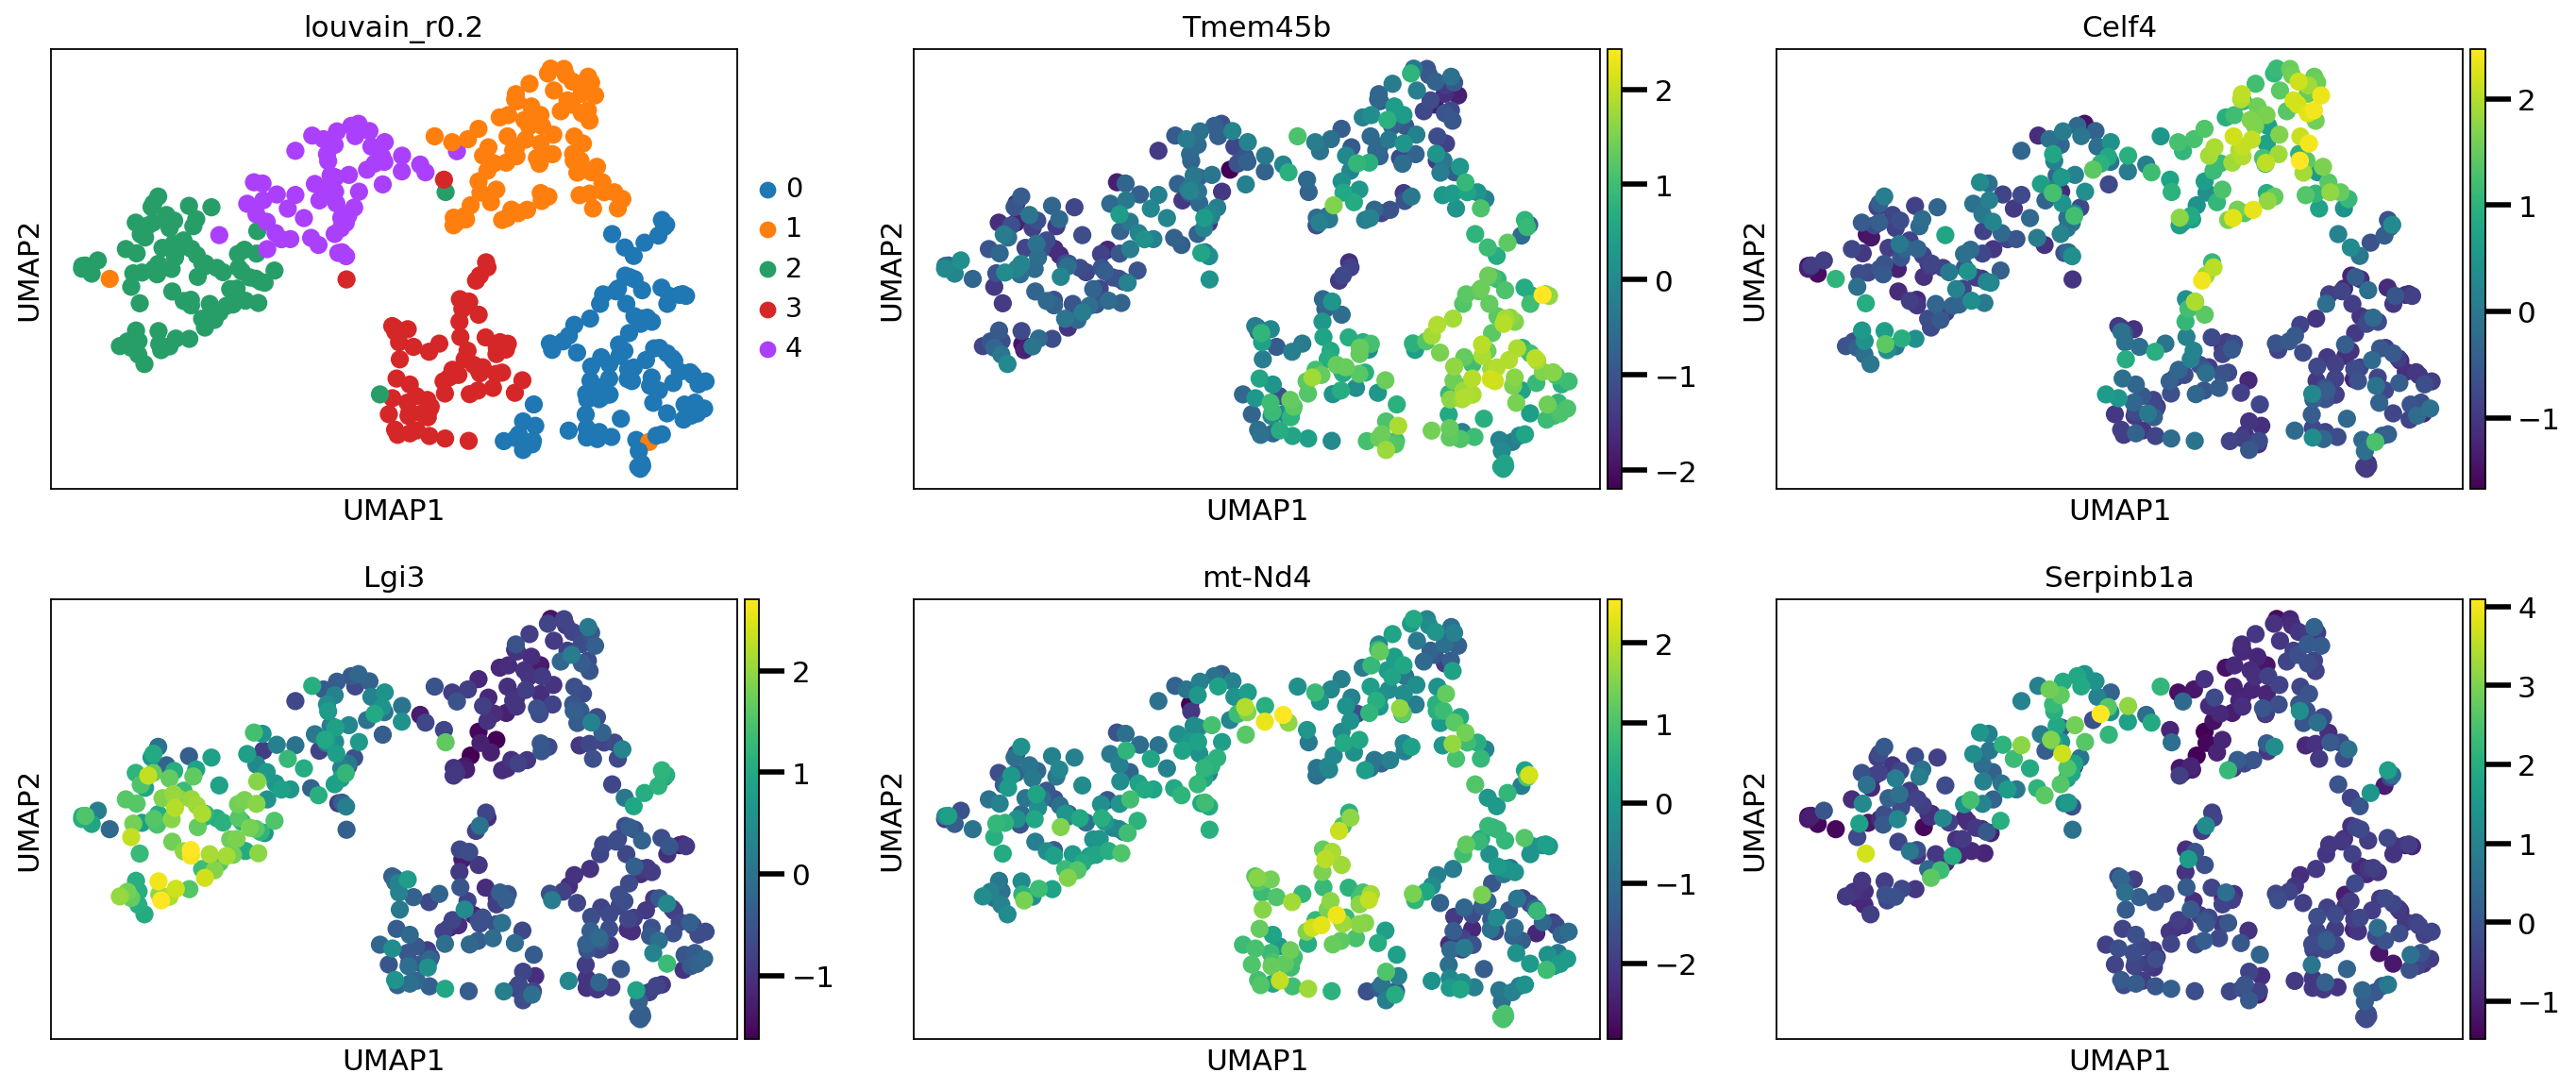

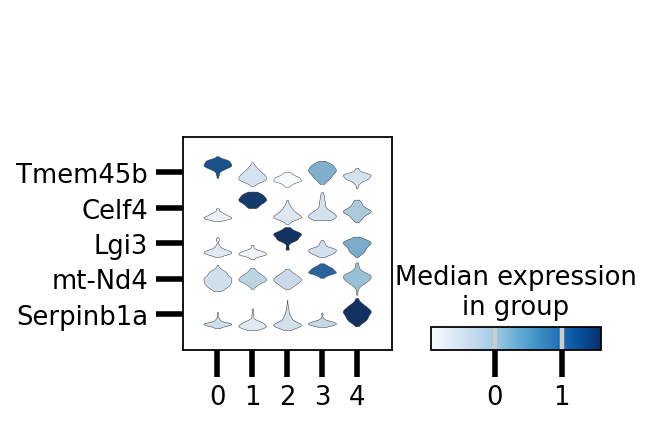

In [29]:

hvgs = []
for i in s2:
    p = []
    t=0
    while(t<1):
        p.append(i[t])
        t=t+1
    hvgs.extend(p)

#Plotting the umap for -
# (i) Leiden clusters colored - used as reference to identify the cluster id for the subsequent figures
# (ii) HVG-wise with heatmap representation. The cluster id where the gene is expressed the highest is obtained from the reference figure

print("Top genes clusterwise clusters - umap embedding with heatmap")
sc.pl.umap(adata, color=[SELECTED_LOUVAIN] + [g for g in hvgs], ncols=3, use_raw=False)

#Plotting stacked violin - captures the expression of HVGs clusterwise
sc.pl.stacked_violin(adata, var_names=hvgs, groupby=SELECTED_LOUVAIN, num_categories=17, use_raw=False,swap_axes=True)

In [30]:
# TAKES VERY LONG TIME
# # for each gene, show 3 plots next to each other:
# # 1) gene value distribution in each cluster (violin plot)
# # 2) umap plot with clusters (to see where each cluster number is)
# # 3) umap plot with gene value distribution in each cluster (values to colormap)
# MY_LEFT = 0.09
# MY_RIGHT = 0.9
# MY_TOP = 0.9
# MY_BOTTOM = 0.2
# MY_WSPACE = 0.3
# MY_HSPACE = 0.5
# # Show violin plots next to clasters
# # compare a certain gene across clasters
# for gene in marker_genes:
#     # This produces two Axes objects in a single Figure
#     ncols=3
#     nrows=1
#     figsize=5
#     wspace=0.2
#     fig,ax = plt.subplots(nrows=nrows, ncols=ncols,
#                         figsize=(ncols*figsize+figsize*wspace*(ncols-1)+4,nrows*figsize+1))
#     plt.subplots_adjust(left=MY_LEFT, 
#                     bottom=MY_BOTTOM,  
#                     right=MY_RIGHT,  
#                     top=MY_TOP,  
#                     wspace=MY_WSPACE,  
#                     hspace=MY_HSPACE)
#     fig.suptitle(gene+' ('+SELECTED_LOUVAIN+')\n', fontsize=16)
#     # We can use these Axes objects individually to plot on them
#     # We need to set show=False so that the Figure is not displayed before we
#     # finished plotting on all Axes and making all plot adjustments
#     sc.pl.violin(adata_umap, gene, use_raw=False, groupby=SELECTED_LOUVAIN,xlabel='Claster', ylabel='',ax=ax[0],show=False)
#     ax[0].set_xlabel("Cluster") # change x label from louvain to claster
#     ax[0].set_ylabel("")
#     sc.pl.umap(adata_umap, color=SELECTED_LOUVAIN, use_raw=False, title='', ax=ax[1],show=False)
#     ax[1].set_xlabel("")
#     ax[1].set_ylabel("")
#     sc.pl.umap(adata_umap, color=gene, use_raw=False, cmap = 'viridis',title='', ax=ax[2],show=False)
#     ax[2].set_xlabel("")
#     ax[2].set_ylabel("")
#     ax[2].set_xticks([])
#     ax[2].set_yticks([]) 
#     plt.show()
#     # fig.savefig(os.path.join(figure_path , 'violin_'+gene+'_'+SELECTED_LOUVAIN+'.png'))

In [31]:
# def find_gene_id (genes_list,gene_name):
#     return genes_list.index(gene_name)
# # # test
# # index=find_gene_id(list(adata_all.var['gene_name']),'Piezo1')
# # adata_all.var['gene_name'][index]

In [32]:
# def create_gene_df(adata_all,adata_umap,gene_idx):
#     columns_names = ['counts','cluster']
#     matrix = np.zeros((adata_all.X.shape[0],2))
#     matrix[:,0] = adata_all.X[:,gene_idx]
#     matrix[:,1] = list(adata_umap.obs['louvain_r2'])
#     matrix.shape
#     raw_df = pd.DataFrame(matrix)
#     raw_df.columns = columns_names
#     return raw_df

In [33]:
# ##################################################
# # show raw counts and normalized on the same plot
# # for each gene, show 3 plots next to each other:
# # 1) gene value distribution in each cluster (violin plot)
# # 2) umap plot with clusters (to see where each cluster number is)
# # 3) umap plot with gene value distribution in each cluster (values to colormap)
# MY_LEFT = 0.09
# MY_RIGHT = 0.9
# MY_TOP = 0.9
# MY_BOTTOM = 0.2
# MY_WSPACE = 0.3
# MY_HSPACE = 0.5
# # Show violin plots next to clasters
# # compare a certain gene across clasters
# for gene in marker_genes:
#     gene_idx = find_gene_id(adata_all.var['gene_name'],gene)
#     gene_df = create_gene_df (adata_all,adata_umap,gene_idx)
#     # print(gene_df)
#     # This produces two Axes objects in a single Figure
#     ncols=3
#     nrows=2
#     figsize=5
#     wspace=0.2
#     fig,ax = plt.subplots(nrows=nrows, ncols=ncols,
#                         figsize=(ncols*figsize+figsize*wspace*(ncols-1)+4,nrows*figsize+1))
#     plt.subplots_adjust(left=MY_LEFT, 
#                     bottom=MY_BOTTOM,  
#                     right=MY_RIGHT,  
#                     top=MY_TOP,  
#                     wspace=MY_WSPACE,  
#                     hspace=MY_HSPACE)
#     fig.suptitle(gene+' ('+SELECTED_LOUVAIN+')\n', fontsize=16)
#     # We can use these Axes objects individually to plot on them
#     # We need to set show=False so that the Figure is not displayed before we
#     # finished plotting on all Axes and making all plot adjustments
#     sb.violinplot(gene_df,x='cluster',y='counts',ax=ax[0,0])
#     sc.pl.violin(adata_umap, gene, use_raw=False, groupby=SELECTED_LOUVAIN,xlabel='Claster', ylabel='',ax=ax[1,0],show=False)
#     # ax[0].set_xlabel("Claster") # change x label from louvain to claster
#     # ax[0].set_ylabel("")
#     sc.pl.umap(adata_umap, color=SELECTED_LOUVAIN, use_raw=False, title='', ax=ax[0,1],show=False)
#     ax[0,1].set_xlabel("")
#     ax[0,1].set_ylabel("")
#     sc.pl.umap(adata_umap, color=SELECTED_LOUVAIN, use_raw=False, title='', ax=ax[1,1],show=False)
#     ax[1,1].set_xlabel("")
#     ax[1,1].set_ylabel("")
#     sc.pl.umap(adata_umap, color=gene, use_raw=False, cmap = 'viridis',title='', ax=ax[1,2],show=False)
#     expression_count=adata_all.X[:,gene_idx]
#     ax[0,2].scatter(adata_umap.obsm['X_umap'][:,0],adata_umap.obsm['X_umap'][:,1],c= expression_count,cmap='viridis')
#     ax[0,2].set_xlabel("")
#     ax[0,2].set_ylabel("")
#     ax[0,2].set_xticks([])
#     ax[0,2].set_yticks([]) 
#     plt.show()
#     fig.savefig(os.path.join(figure_path , 'violin_'+gene+'_'+SELECTED_LOUVAIN+'.png'))

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_louvain_r0.2']`
categories: 0, 1, 2, etc.
var_group_labels: RA-LTMR, C-LTMR, Itch, etc.


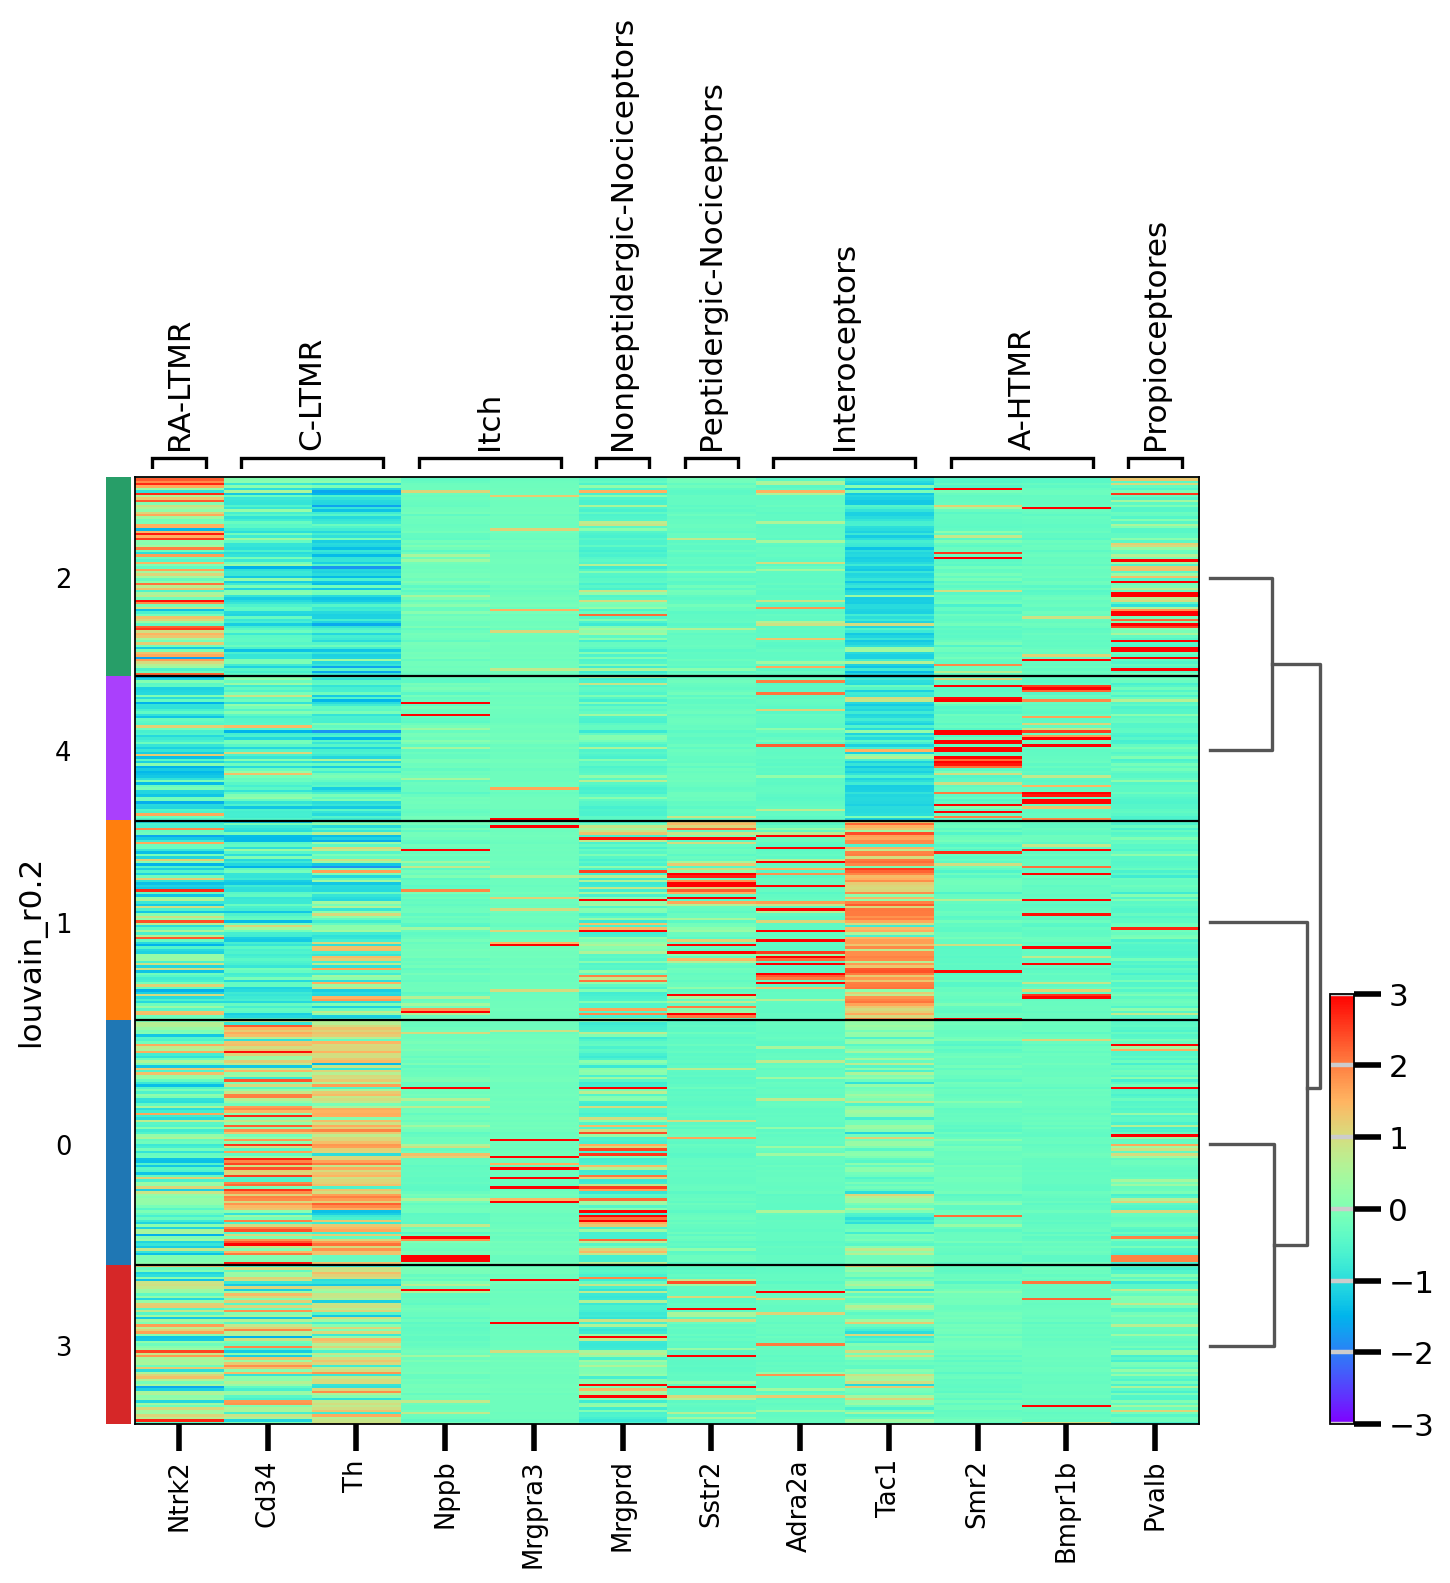

In [34]:
sc.pl.heatmap(adata, marker_genes_dict, groupby=SELECTED_LOUVAIN, cmap='rainbow', use_raw=False, figsize=(10,8), 
              show=True,show_gene_labels=True, dendrogram = True,vmin=-3,vmax=3)

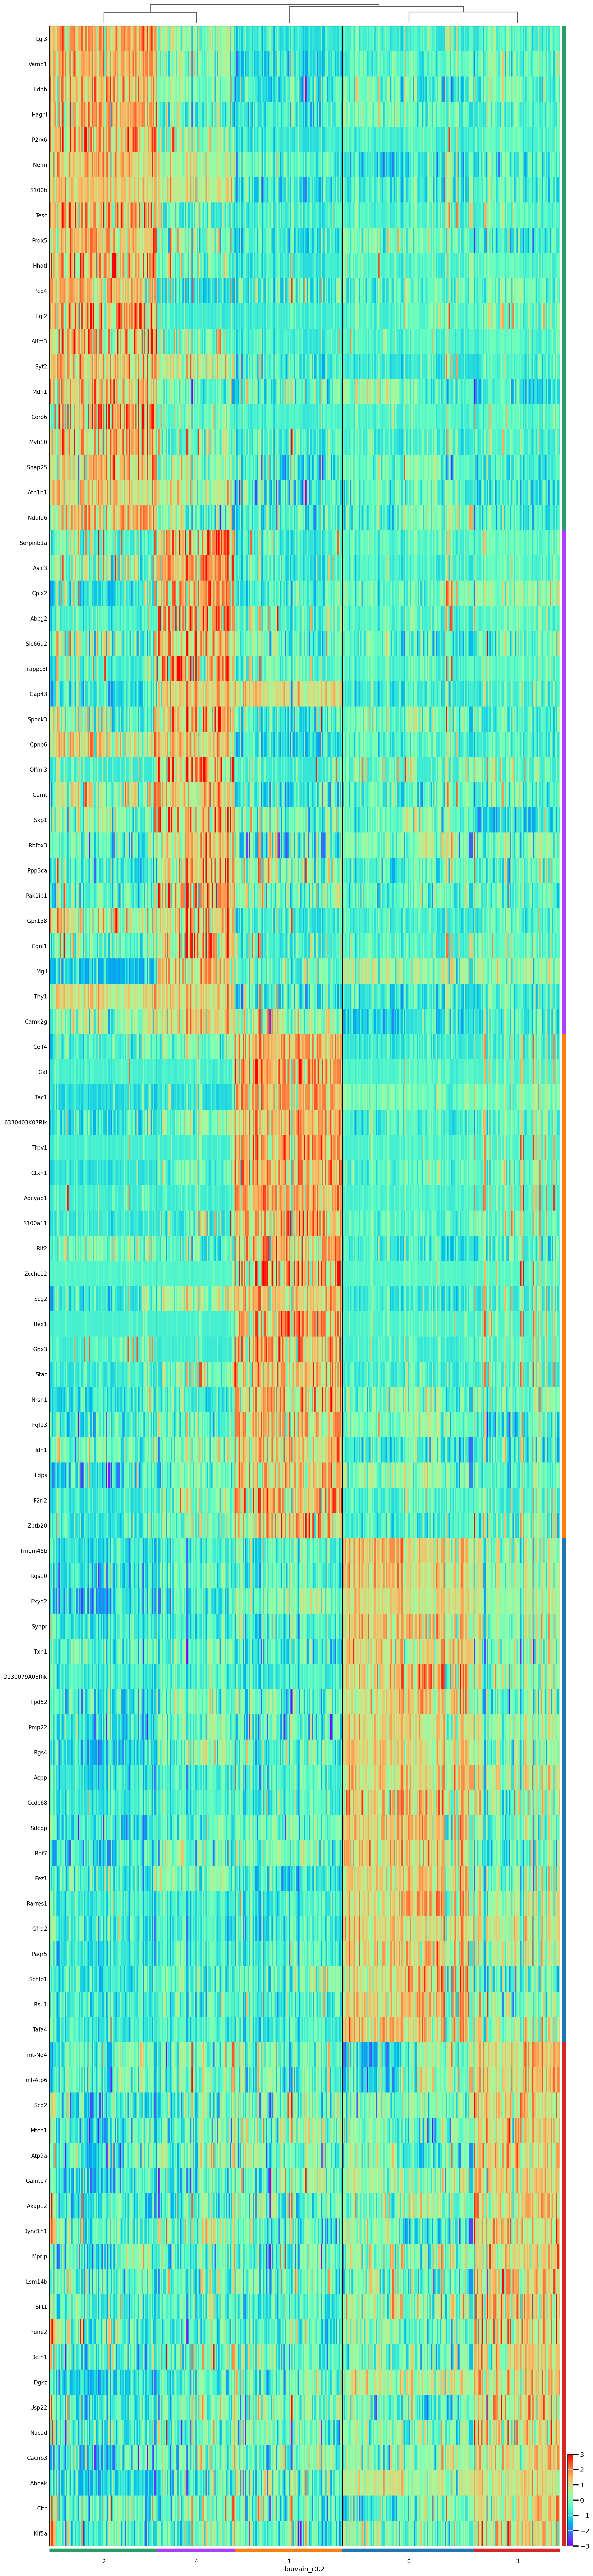

In [35]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=20, use_raw=False, show_gene_labels=True,swap_axes=True, vmin=-3, vmax=3, cmap='rainbow', figsize=(20,100), show=True, dendrogram = True)